<a href="https://colab.research.google.com/github/phjlia2430/FoodRecognition/blob/main/foodAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!unzip -q "./food_images.zip" -d "./food_images/"

In [4]:
import numpy as np
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.utils import load_img, img_to_array, to_categorical
from sklearn.metrics import confusion_matrix

# 📌 Step 2: 데이터 로드 함수
IMAGE_SIZE = (128, 128)

def load_train_data(folder_path):
    """훈련 데이터 로드"""
    X, y = [], []
    class_names = os.listdir(folder_path)
    print("클래스 목록:", class_names)

    for i, class_name in enumerate(class_names):
        class_path = os.path.join(folder_path, class_name)
        for image_name in os.listdir(class_path):
            if image_name.endswith('.jpg'):
                image_path = os.path.join(class_path, image_name)
                image = load_img(image_path, target_size=IMAGE_SIZE)
                image = img_to_array(image)
                X.append(image)
                y.append(i)
    X = np.array(X) / 255.0  # 정규화
    y = np.array(y)
    return X, y, class_names

def load_test_data(folder_path):
    """테스트 데이터 로드"""
    X, filenames = [], []
    for image_name in os.listdir(folder_path):
        if image_name.endswith('.jpg'):
            image_path = os.path.join(folder_path, image_name)
            image = load_img(image_path, target_size=IMAGE_SIZE)
            image = img_to_array(image)
            X.append(image)
            filenames.append(image_name)
    X = np.array(X) / 255.0  # 정규화
    return X, filenames



# 📌 Step 3: 데이터 불러오기
train_folder = "./food_images/food_images/train"
test_folder = "./food_images/food_images/test"

X_train, y_train, class_names = load_train_data(train_folder)
X_test, test_filenames = load_test_data(test_folder)

# 📌 Step 4: 데이터 분할 (훈련 80%, 검증 20%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# One-hot encoding
num_classes = len(class_names)
train_labels = to_categorical(y_train, num_classes)
val_labels = to_categorical(y_val, num_classes)

# 📌 Step 5: CNN 모델 생성
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(128, 128, 3)),
    keras.layers.MaxPooling2D((2,2), strides=2),
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2,2), strides=2),
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

클래스 목록: ['깻잎', '바나나', '유자', '호박', '멸치', '콩나물', '대파', '명란', '머스타드', '김', '단무지', '시금치', '치즈', '사과', '옥수수', '브로콜리', '자몽', '케찹', '파프리카', '상추', '콩', '생닭고기', '만두', '메추리알', '조개', '배추', '밤']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      33,555,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 27)                  │          13,851 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,394,619 (131.21 MB)

 Trainable params: 34,394,619 (131.21 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# 📌 Step 6: 모델 컴파일 & 학습
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, train_labels, epochs=10, batch_size=128, validation_data=(X_val, val_labels), verbose=1)

# 📌 Step 7: 모델 평가
test_loss, test_acc = model.evaluate(X_val, val_labels, verbose=0)
print('\n✅ 테스트 정확도:', test_acc)


Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 174ms/step - accuracy: 0.1156 - loss: 3.2006 - val_accuracy: 0.3123 - val_loss: 2.2466
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 70ms/step - accuracy: 0.3682 - loss: 2.0245 - val_accuracy: 0.4292 - val_loss: 1.8210
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.4585 - loss: 1.7207 - val_accuracy: 0.4296 - val_loss: 1.8567
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.5100 - loss: 1.5367 - val_accuracy: 0.5060 - val_loss: 1.5915
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.5971 - loss: 1.2674 - val_accuracy: 0.5086 - val_loss: 1.5832
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.6513 - loss: 1.0931 - val_accuracy: 0.5337 - val_loss: 1.5196
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.7274 - loss: 0.8307 - val_accuracy: 0.5486 - val_loss: 1.5635
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.7904 - loss: 0.6506 - val_accuracy: 0.

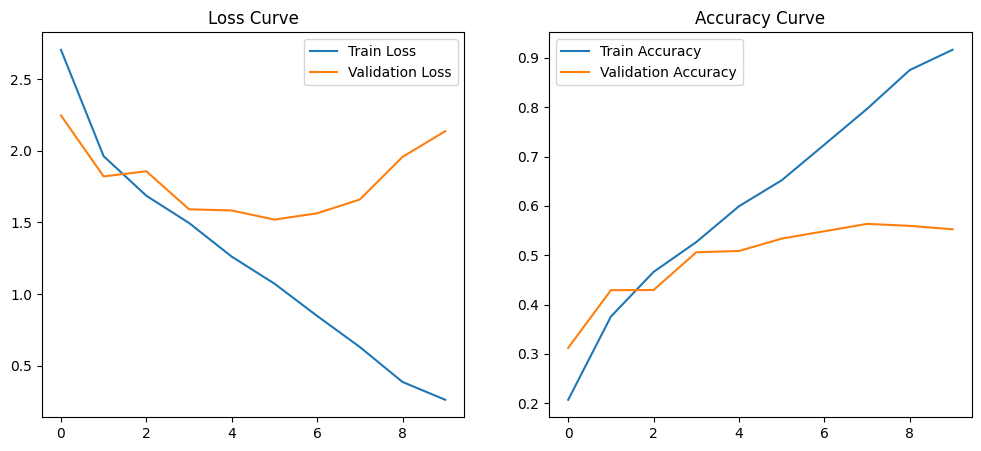

86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44667 (\N{HANGUL SYLLABLE GGAES}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51086 (\N{HANGUL SYLLABLE IP}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48148 (\N{HANGUL SYLLABLE BA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/lo

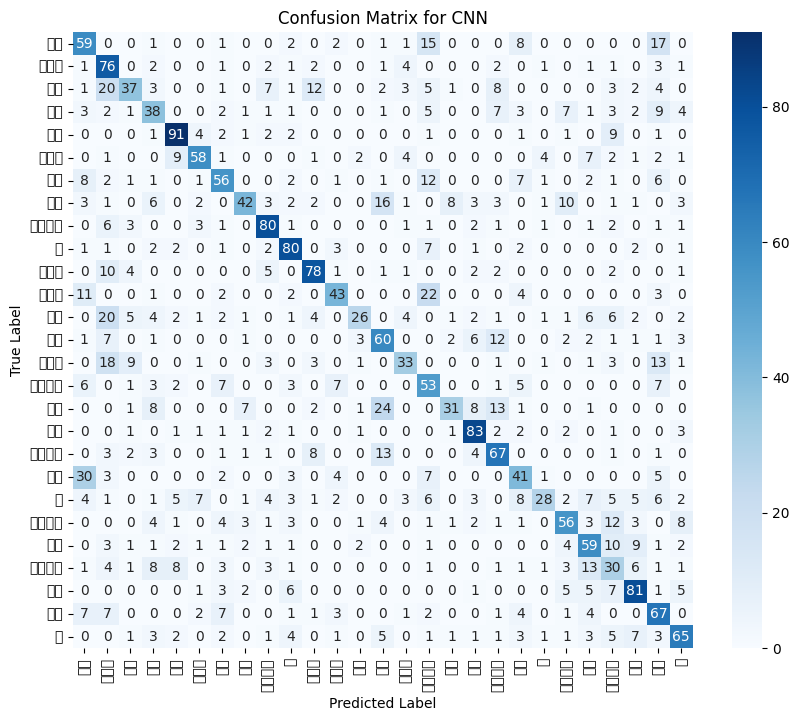

In [6]:
# 📌 Step 8: 학습 과정 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Curve")

plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy Curve")

plt.show()

# 📌 Step 9: 혼동 행렬 시각화
predictions = model.predict(X_val)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(val_labels, axis=1)

conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CNN')
plt.show()

In [7]:
import numpy as np
import os
import keras
from keras.preprocessing.image import load_img, img_to_array
from google.colab import files
from io import BytesIO
from PIL import Image

# ✅ 이미지 업로드 및 예측 함수
def predict_uploaded_image(model, class_names):
    IMAGE_SIZE = (128, 128)

    uploaded = files.upload()  # 사용자 이미지 업로드

    for filename in uploaded.keys():
        # 이미지 로드 및 전처리
        image = Image.open(BytesIO(uploaded[filename]))
        image = image.resize(IMAGE_SIZE)
        image = img_to_array(image) / 255.0
        image = np.expand_dims(image, axis=0)

        # 모델 예측 수행
        prediction = model.predict(image)
        predicted_label = np.argmax(prediction, axis=1)[0]
        confidence = max(prediction[0]) * 100

        print(f"\n업로드된 이미지: {filename}")
        print(f"예측된 음식: {class_names[predicted_label]} (확률: {confidence:.2f}%)")

# ✅ 실행: 이미지 업로드 후 예측
predict_uploaded_image(model, class_names)

Saving 80.jpg to 80.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step

업로드된 이미지: 80.jpg
예측된 음식: 깻잎 (확률: 94.92%)


In [8]:
# 모델 저장
model.save("food_recognition_model.h5")

In [ ]:
# 모델 저장
model.save("food_recognition_model.keras")